In [1]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import os 
import subprocess
import stat
import ast
import pandas as pd 

In [2]:
def obtain_data(csv_file_path,mission_name):
    df = pd.read_csv(csv_file_path)
    df1 =df.set_index('name')

    score1 = df1.loc[f'{mission_name}_100%']['score']
    data1 = ast.literal_eval(score1)

    score2 = df1.loc[f'{mission_name}_80%']['score']
    data2 = ast.literal_eval(score2)

    score3 = df1.loc[f'{mission_name}_60%']['score']
    data3 = ast.literal_eval(score3)

    score4 = df1.loc[f'{mission_name}_40%']['score']
    data4 = ast.literal_eval(score4)

    score5 = df1.loc[f'{mission_name}_20%']['score']
    data5 = ast.literal_eval(score5)
    
    return [data1,data2,data3,data4,data5]


In [3]:
def obtain_data2(csv_file_path,mission_name):
    df = pd.read_csv(csv_file_path)
    df1 =df.set_index('name')

    score1 = df1.loc[f'{mission_name}_100%']['score']
    data1 = ast.literal_eval(score1)

    score5 = df1.loc[f'{mission_name}_20%']['score']
    data5 = ast.literal_eval(score5)
    
    return [data1,data5]


In [4]:
def plot_data(data, plot_title):
    plt.boxplot(data, notch=True)
    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    plt.title(plot_title, fontsize=20, family='sans-serif', pad=30)
    plt.xticks(np.array([1,2,3,4,5]),['100%', '80%','60%','40%','20%'], fontsize=15)
    plt.yticks(fontsize=15)
    # plt.savefig("boxplot_aac.png", bbox_inches='tight')

In [5]:
def plot_data2(data, plot_title):
    plt.boxplot(data, notch=True)
    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    plt.title(plot_title, fontsize=20, family='sans-serif', pad=30)
    plt.xticks(np.array([1,2]),['100%', '20%'], fontsize=15)
    plt.yticks(fontsize=15)
    # plt.savefig("boxplot_aac.png", bbox_inches='tight')

In [6]:
def run_Argos(argos, source):
    # run argos with passed fsm to write hitory file
    with open("./argos.sh",'w+') as f:
        f.write("#!/usr/bin/env python\n")
        f.write(f"argos3 -c {argos}")

    st = os.stat('./argos.sh')
    os.chmod('./argos.sh', st.st_mode | stat.S_IEXEC)

    subprocess.run(["bash", 'argos.sh'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    subprocess.Popen(['bash', '-c', source], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

In [7]:
argos_file_path = '/home/robotmaster/argos3-installation/habanero/habanero-loopfunctions/scenarios/communication/aggregation.argos'
n_exp = 10
file_path = '/home/robotmaster/argos3-installation/habanero/habanero-loopfunctions/data/score_aggregation.txt'

fsm_config_dict = "--nstates 2 --s0 7 --rwm0 5 --cle0 0 --phe0 0 --n0 1 --n0x0 0 --c0x0 5 --p0x0 0.9 --l0x0 6 --f0x0 1 --s1 9 --fov1 1 --vel1 1.0 --cle1 6 --clr1 6 --phe1 0 --n1 1 --n1x0 0 --c1x0 3 --p1x0 0.5"
new_quantity = 16


source = "source /home/robotmaster/argos3-installation/habanero/argos3-dist/bin/setup_argos3"

# os.remove(file_path)
data_score = []
for _ in range(n_exp):
    run_Argos(argos_file_path, source)

score = open(file_path)


with open(file_path, 'r') as f:
    for score in f.readlines(): 
        data_score.append(ast.literal_eval(score[:-1]))

print(data_score)

exp_name = 'aggregation5_habanero_20%'

# Example data to append
new_data = {'name': exp_name, 'fsm': fsm_config_dict, 'swarm': new_quantity,'iteraciones':n_exp, 'score': data_score}

# Path to the CSV file
csv_file_path = '/home/robotmaster/argos3-installation/habanero/habanero-loopfunctions/data/score.csv'

# Try to read the existing CSV file, or create a new DataFrame if the file doesn't exist
try:
    df = pd.read_csv(csv_file_path)
except FileNotFoundError:
    # If the file doesn't exist, create a new DataFrame with the specified columns
    df = pd.DataFrame(columns=['name', 'fsm', 'swarm', 'iteraciones', 'score'])

# Create a new DataFrame from the new_data
new_df = pd.DataFrame([new_data])

# Concatenate the existing DataFrame and the new DataFrame along the rows (axis=0)
df = pd.concat([df, new_df], ignore_index=True)

# Write the updated DataFrame back to the CSV file
df.to_csv(csv_file_path, index=False)

[755.034, 712.834, 335.169, 341.001, 370.509, 639.064, 590.675, 704.85, 523.895, 540.346]


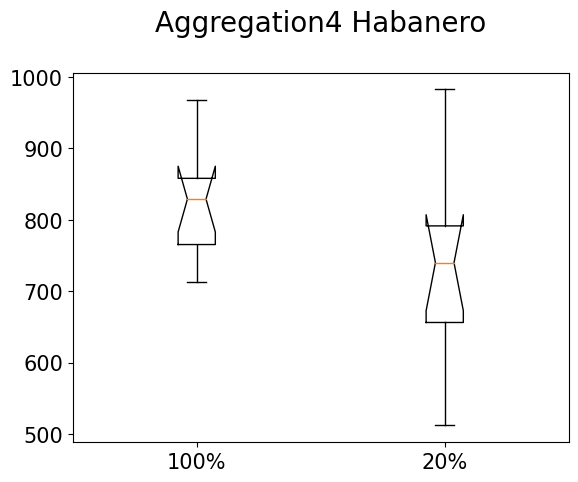

In [8]:
[data1,data5] = obtain_data2(csv_file_path = 'score.csv', mission_name='aggregation4_habanero')
plot_data2([data1,data5], 'Aggregation4 Habanero')

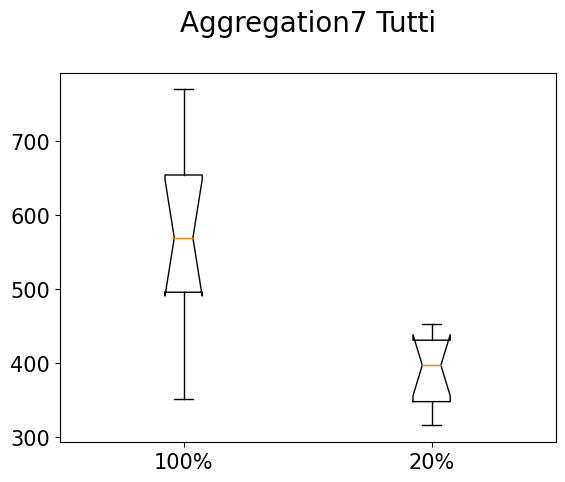

In [11]:
[data1,data5] = obtain_data2(csv_file_path = 'score.csv', mission_name='aggregation7_tutti')
plot_data2([data1,data5], 'Aggregation7 Tutti')